In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read all words
words = open('names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s  in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [94]:
block_size = 3
X ,Y = [],[]    
for w in words:
    # print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print("".join(itos[i] for i in context), '---->', itos[ix])    
        context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)


In [98]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [164]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [11]:
C = torch.randn((27,2))

In [16]:
C[5]

tensor([-0.3947,  0.7809])

In [21]:
C[X].shape

torch.Size([32, 3, 2])

In [31]:
X[:1]

tensor([[0, 0, 0]])

In [30]:
C[X[:1]]

tensor([[[-0.0582, -0.0414],
         [-0.0582, -0.0414],
         [-0.0582, -0.0414]]])

In [32]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [34]:
W1 = torch.randn(6,100)
b1 = torch.randn(100)

In [60]:
h = torch.tanh(emb.view(-1,6) @W1 + b1)
h

tensor([[ 0.3629,  0.5808,  0.3733,  ..., -0.8207,  0.4861, -0.9488],
        [ 0.9377,  0.1038,  0.8055,  ..., -0.8486, -0.7572, -0.9916],
        [-0.9973, -0.8167, -0.0238,  ..., -0.8818,  0.9002, -0.9688],
        ...,
        [-1.0000, -0.9996, -0.4691,  ..., -0.9097,  0.4349, -0.9972],
        [-0.9879,  0.9971, -0.1725,  ...,  0.9981,  0.9998,  0.5898],
        [ 0.9985,  0.9528,  0.6093,  ..., -0.4780,  0.0908, -0.9034]])

In [58]:

h.shape

torch.Size([32, 100])

In [62]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)

In [63]:
logits = h @W2 + b2
logits.shape

torch.Size([32, 27])

In [65]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)


In [66]:
probs.shape

torch.Size([32, 27])

In [70]:
loss = -probs[torch.arange(32),Y].log().mean()
loss

tensor(13.9816)

In [67]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [56]:


# we would like emb @ W1 + b1   



torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]],1).shape

torch.Size([32, 6])

In [42]:
torch.cat(torch.unbind(emb, 1),1).shape

torch.Size([32, 6])

In [44]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [45]:
a.shape

torch.Size([18])

In [49]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [50]:
a.storage()

/tmp/ipykernel_355950/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [51]:
# checout pytorch internals blog by eric 

emb.shape

torch.Size([32, 3, 2])

In [55]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [187]:
###  resepectable version of the model
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn(30,200, generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn(200,27, generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [188]:
sum(p.nelement() for p in parameters) # number of parameters in total


11897

In [189]:
for p in parameters:
    p.requires_grad = True

In [190]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
lri = []
lossi = []
stepi = []


In [193]:

for i in range(30000):
    # mini batch
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)# 32,100

    logits = h @ W2 + b2
    # counts = logits.exp() // never use these intermediate steps just use cross entropy its better behaved numerically
    # probs = counts / counts.sum(1, keepdim=True)
    # loss = -probs[torch.arange(32),Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    # lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data  += -lr * p.grad
    #  track status
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())


# print(loss.item())


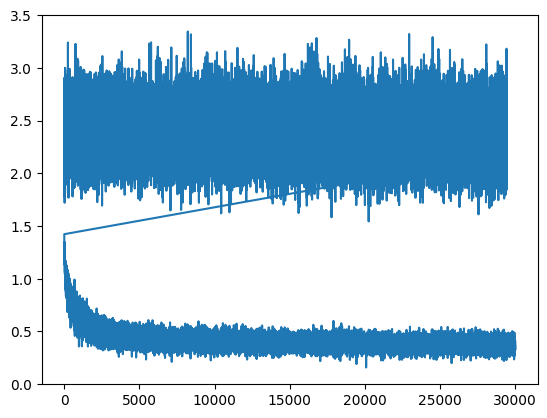

In [192]:
plt.plot(stepi,lossi)

In [182]:
print(loss.item())


2.018993616104126


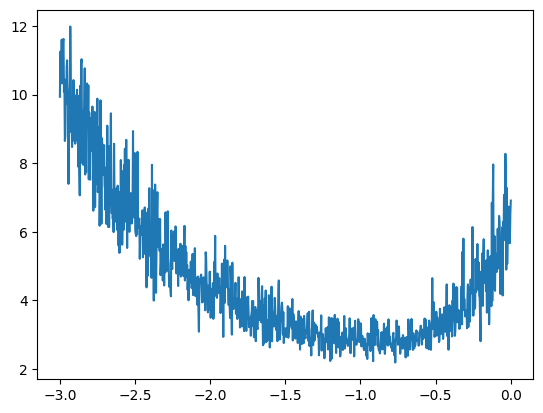

In [134]:
plt.plot(lri, lossi)

In [183]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.4945, grad_fn=<NllLossBackward0>)

In [184]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4939, grad_fn=<NllLossBackward0>)

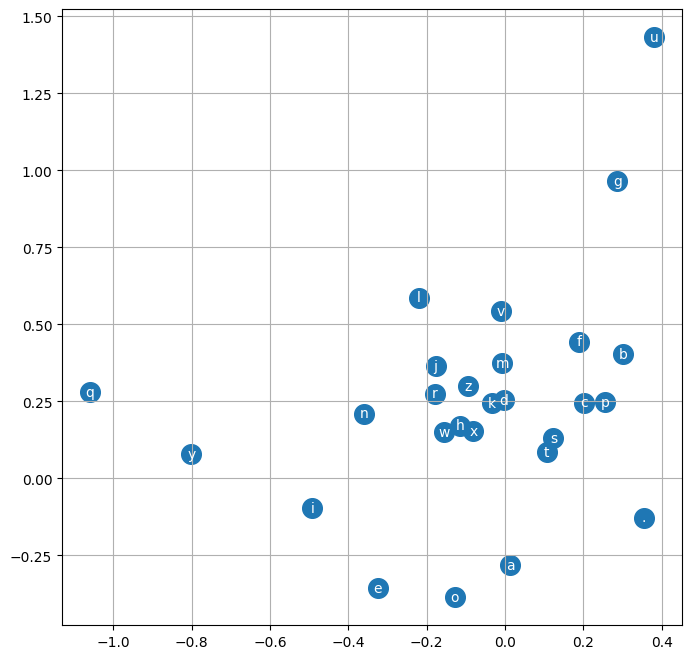

In [185]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [93]:
logits.max(1)

torch.return_types.max(
values=tensor([12.5155, 16.1859, 19.9332, 19.5513, 15.5963, 12.5155, 14.9063, 13.2860,
        15.0078, 17.1497, 14.7097, 19.7565, 12.5155, 15.7184, 15.9862, 18.8103,
        12.5155, 15.4787, 13.8116, 15.7347, 17.5781, 14.7050,  9.7818,  9.7048,
        14.8212, 12.5155, 15.2214, 15.8896, 12.0754, 15.4486, 17.8327, 14.5365],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [83]:
logits = torch.tensor([-5,-3,0,100]) - 100
counts = logits.exp()   
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [89]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
# training split TO TRAIN WIEGHT, dev velidation split to tune hyperparamters, test split used only few times to evaluate the model
# 80% 10% 10%
